# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
os.chdir("F:\CDAC\Advance_Analytics\Datasets\Airline_Passenger_Prediction")

# Reading the Dataset

In [4]:
air_passenger = pd.read_csv("train.csv", index_col = 0)
air_passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# EDA

In [5]:
# Making a copy of originaal dataset
aps = air_passenger.copy()
aps

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
# First 5 values
aps.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
# Last 5 values
aps.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [8]:
# Describing the data
aps.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
# Information about the data
aps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [10]:
# Checking for Duplicate values
aps.duplicated().sum()

0

In [11]:
# Checking the Datatypes of the Data
aps.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [12]:
# Listing all the columns in the data
aps.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [13]:
# Displaying the classes and their counts
aps['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

# Univariate Analysis

### Histograms

In [14]:
# User defined function for Boxplot
def boxplot(dataframe, feature_name):
    sns.boxplot(data = dataframe, y = feature_name)
    plt.show()

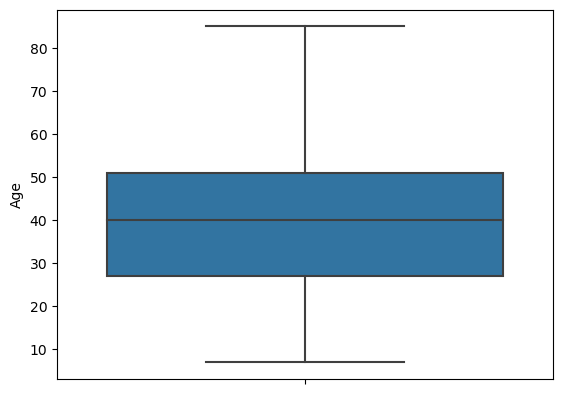

In [15]:
boxplot(aps,'Age')

Observations: Age column does not have Outliers.

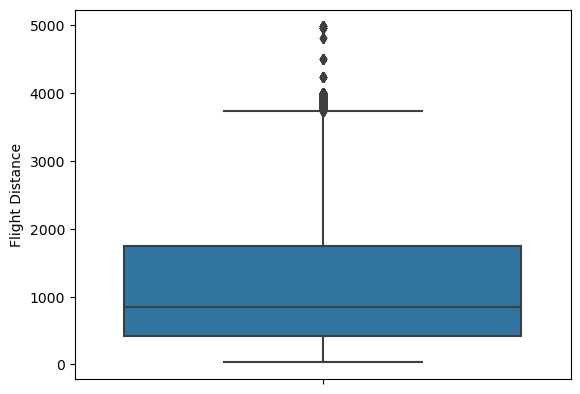

In [16]:
boxplot(aps,'Flight Distance')

Observations: Flight distance has some values that are bigger than most other values. i.e. outliers.

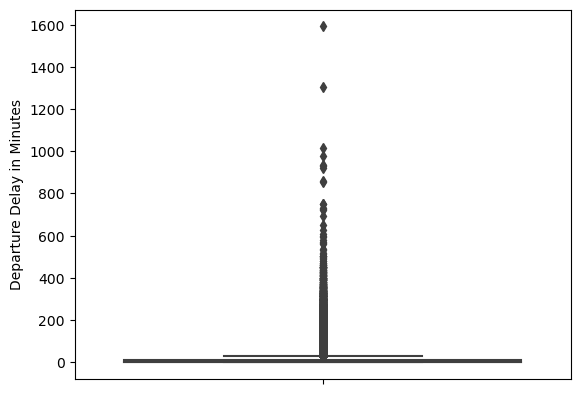

In [17]:
boxplot(aps,'Departure Delay in Minutes')

Obervation: Departure Delay in Minutes has huge number of Outliers so will drop the column during prediction as it will affect the accuracy of model.

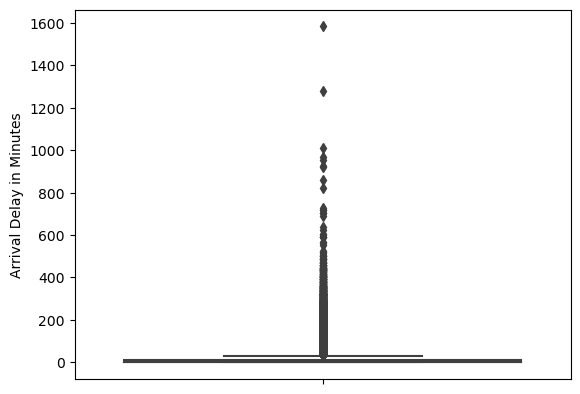

In [18]:
boxplot(aps,'Arrival Delay in Minutes')

Obervation: Arrival Delay in Minutes has hue number of Outliers so will drop the column during prediction as it will affect the accuracy of model.

### Histograms

In [19]:
def histplot(feature_name, figure_color, row, column):
    # aps is the name of current dataframe
    sns.histplot(aps, x = feature_name, color = figure_color, ax = axes[row][column])

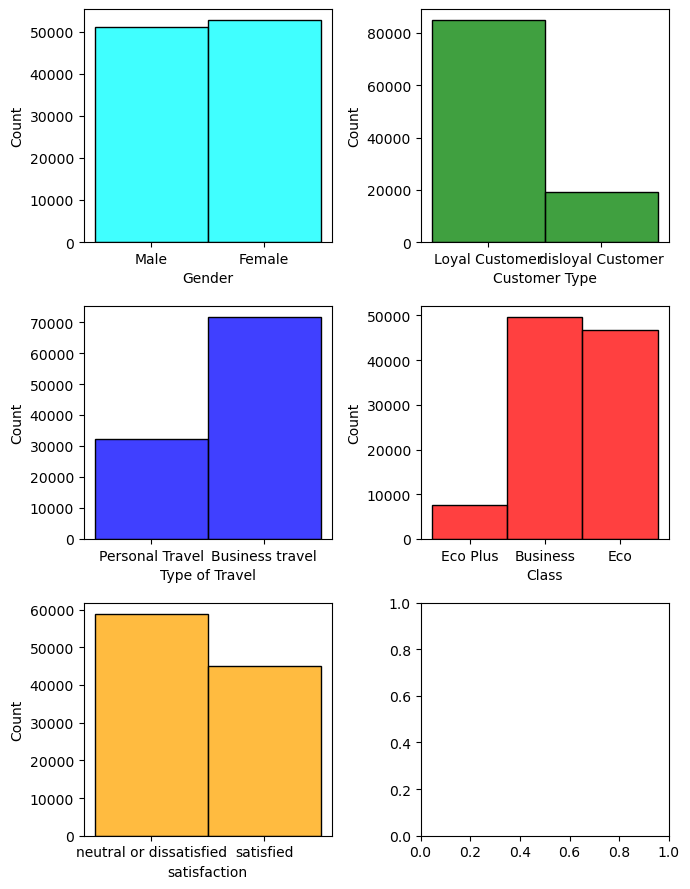

In [20]:
plt.rcParams['figure.figsize'] = [7,9]
plt.rcParams['figure.autolayout'] = True
# f is overall reference to the figure and axes states how many subplots to plot (rows,columns)
f, axes = plt.subplots(3,2)
histplot("Gender", 'cyan', 0, 0,)
histplot("Customer Type", 'green', 0, 1)
histplot("Type of Travel", 'blue', 1, 0)
histplot("Class", 'red', 1, 1)
histplot("satisfaction",'orange', 2, 0)

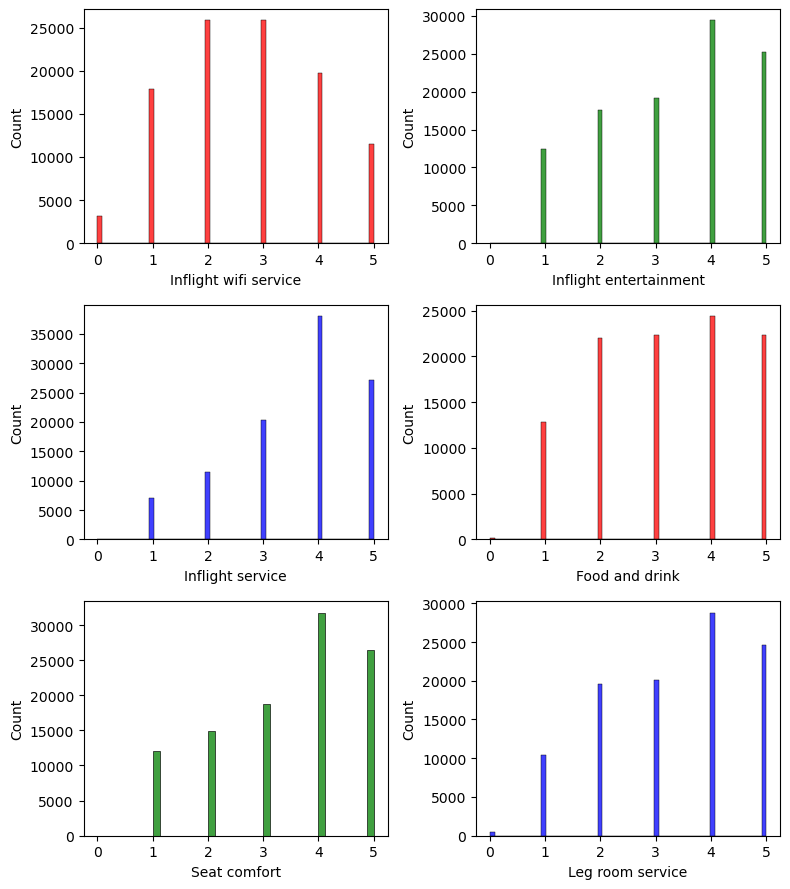

In [21]:
plt.rcParams['figure.figsize'] = [8,9]
plt.rcParams['figure.autolayout'] = True
f1, axes = plt.subplots(3,2)
histplot('Inflight wifi service', 'red', 0, 0)
histplot('Inflight entertainment', 'green', 0, 1)
histplot('Inflight service', 'blue', 1, 0)
histplot('Food and drink', 'red', 1, 1)
histplot('Seat comfort', 'green', 2, 0)
histplot('Leg room service', 'blue', 2, 1)

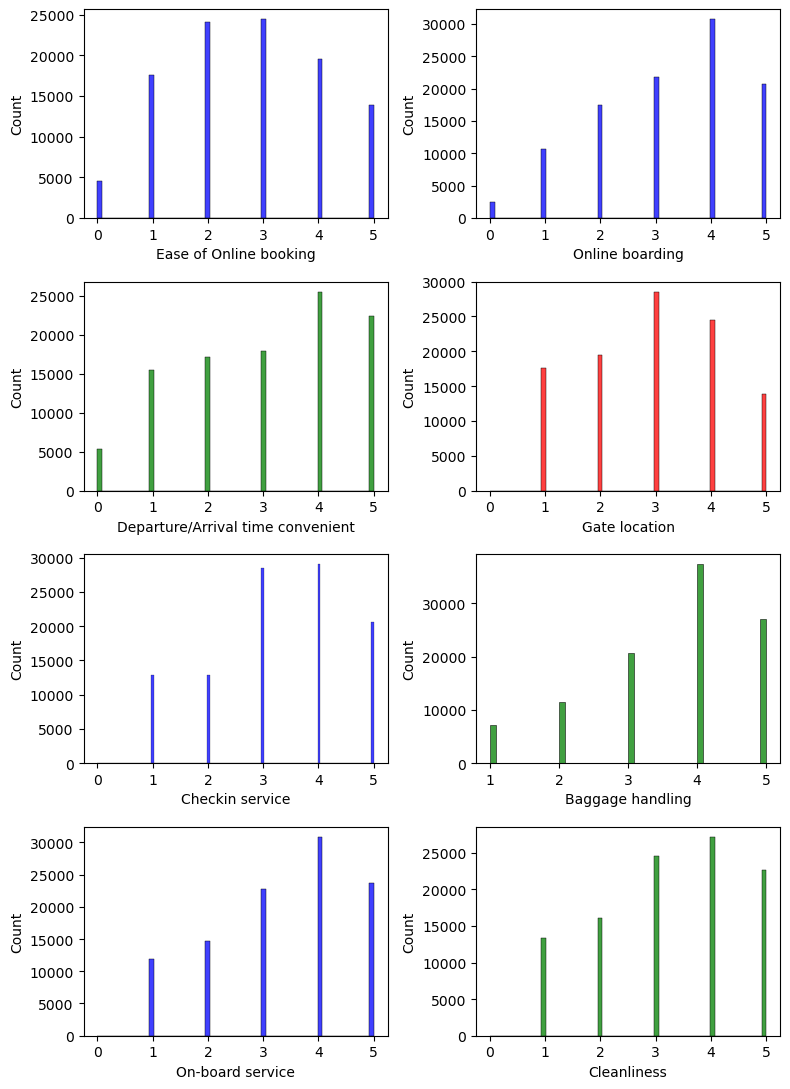

In [25]:
plt.rcParams['figure.figsize'] = [8,11]
plt.rcParams['figure.autolayout'] = True
f2, axes = plt.subplots(4,2)
histplot('Ease of Online booking', 'blue', 0, 0)
histplot('Online boarding', 'blue', 0, 1)
histplot('Departure/Arrival time convenient', 'green', 1, 0)
histplot('Gate location', 'red', 1, 1)
histplot('Checkin service', 'blue', 2, 0)
histplot('Baggage handling', 'green', 2, 1)
histplot('On-board service', 'blue', 3, 0)
histplot('Cleanliness', 'green', 3, 1)

### Bivariate Analysis

### Correlation Heatmap

In [23]:
#considering only numerical features for checking correlation
corr_aps = aps.drop(['id', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Arrival Delay in Minutes', 'satisfaction'], axis = 1)
corr_aps

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,13,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,25,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,26,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,25,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,61,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3
103900,49,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0
103901,30,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7
103902,22,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


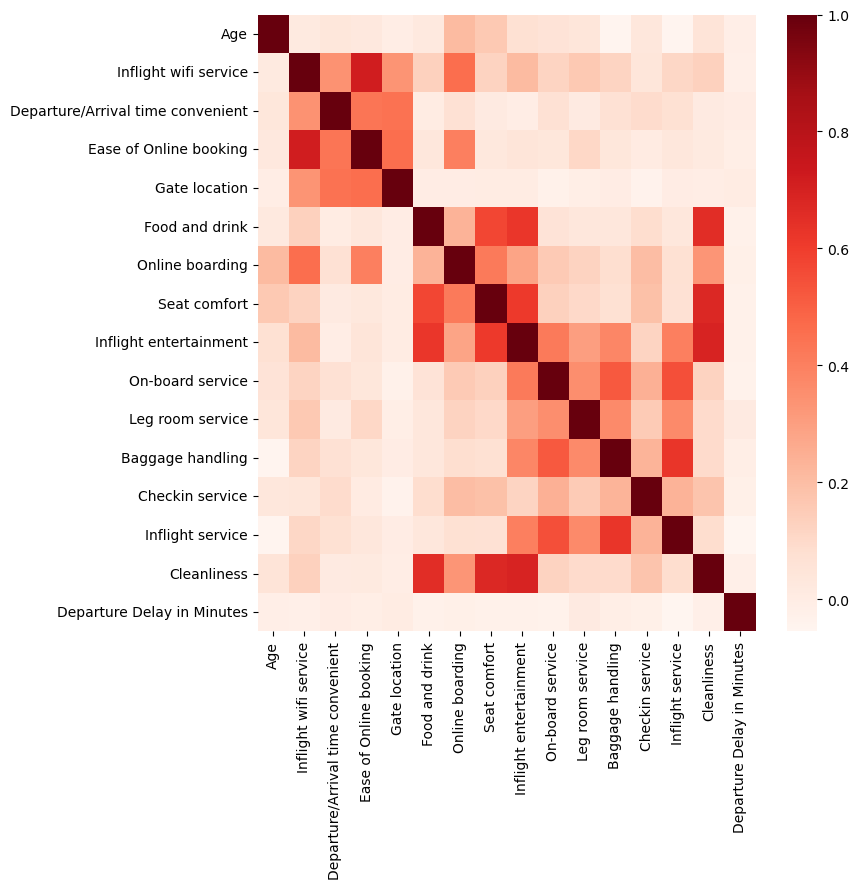

In [24]:
corr = corr_aps.corr()
plt.figure(figsize = [9,9])
sns.heatmap(corr, cmap ="Reds")
plt.show()

Observation: 
1. 'Cleanliness' is highly correlated with 'Food and Drink', 'Seat Comfort' and 'Inflight entartainment'
2. 'Ease of online booking' is highly correlated 'Inflight wifi service'

### CountPlots

In [80]:
def countplot(col_name, hue_col):
    plt.figure(figsize = (6,5))
    sns.countplot(data = aps, y = col_name, hue = hue_col)
    plt.show()

In [90]:
bins = [0, 18, 30, 50, 70, float('inf')]
labels = ['0-17', '18-29', '30-49', '50-69', '70+']
aps['age_group'] = pd.cut(aps['Age'], bins=bins, labels=labels, right=False)
aps['age_group'].value_counts()

age_group
30-49    44355
50-69    27449
18-29    22796
0-17      7931
70+       1373
Name: count, dtype: int64

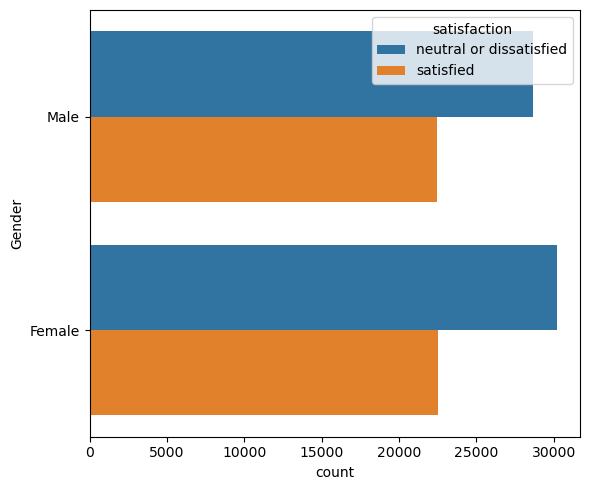

In [85]:
plt.figure(figsize = (6,5))
sns.countplot(data = aps, y='Gender', hue='satisfaction')
plt.show()

Observation: 
1. Amongst the both Gender more number of passengers are neutral/dissatisfied.
2. the neutral/dissatisfaction count is highest for Female's.

Seperating the Dependant variable and Independant variables.
Also dropping the columns that wont be required for prediction

In [31]:
X = aps.drop(['id','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction'], axis = 1)
X


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [32]:
y = aps['satisfaction']
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

## Generating dummy values

In [16]:
#generating dummy values for seperating multi classes into features
dum_X = pd.get_dummies(X, drop_first = True)
dum_X

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,3,4,4,5,5,True,False,True,False,True
1,25,235,3,2,3,3,1,3,1,1,...,5,3,1,4,1,True,True,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,3,4,4,4,5,False,False,False,False,False
3,25,562,2,5,5,5,2,2,2,2,...,5,3,1,4,2,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,4,4,3,3,3,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,1,4,2,3,2,False,True,False,True,False
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,5,5,4,True,False,False,False,False
103901,30,1995,1,1,1,3,4,1,5,4,...,2,4,5,5,4,True,True,False,False,False
103902,22,1000,1,1,1,5,1,1,1,1,...,5,1,5,4,1,False,True,False,True,False
